# EDA on Landscape of Political Donations in India
        
             Political donations play a crucial role in financing elections and shaping the political landscape of any country. Understanding the patterns and trends in these donations can shed light on the influence of money in politics, transparency, and potential biases. In India, political parties are required to disclose donations above a certain threshold, offering valuable data for analysis. This project aims to conduct an exploratory data analysis (EDA) on a dataset of donations to Indian political parties to uncover insights and raise questions about the current funding landscape.
            
## Problem Statement:
            
            Limited transparency and understanding exist regarding sources and patterns of political donations in India. This project uses EDA to explore a political donation dataset, aiming to uncover:
              - Donor profiles: Who are the key contributors and are there industry/sector biases?
              - Geographical trends: Do specific regions or states dominate donations?
              - Temporal evolution: Have donation amounts/sources changed over time?
              - Potential irregularities: Can we identify outliers or suspicious patterns?
            By uncovering these insights, the project seeks to shed light on the current state of political funding in India and its potential impact on the democratic process.
           

## About the Dataset:

<h3>Context</h3>

Donations to political parties from India containing 12 Years of data.

Time Period: 2003-04 to 2014-15 <br>
Granularity: Yearly <br>
Entity: Major Indian political parties

<h3>Columns</h3>

    1. Political Party
    2. Donator
    3. Address
    4. Pan Y/N
    5. Amount
    6. Contribution Mode
    7. Financial Year

<h3>Acknowledgements</h3>

Data source is from https://www.myneta.info/
dataset downloaded from https://data.world/ambarishn/donations-to-political-parties 

#

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

#

## Read dataset from MS Excel file

In [3]:
df = pd.read_excel('Donations to national political parties - India.xlsx')
df.head()

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,Financial Year,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,3000000,CASH,2010-11,NaN,NaN,NaN,NaN,NaN,NaN
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,10000000,"000037, HDFC Bank Bengaluru, Dt. 16.03.2015, 5...",2014-15,NaN,NaN,NaN,NaN,NaN,NaN
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,108000,"Cheque, State Bank of India Parliament House N...",2014-15,NaN,NaN,NaN,NaN,NaN,NaN
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,54000,Through Bank Transfer,2011-12,NaN,NaN,NaN,NaN,NaN,NaN
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,54000,Through Bank Transfer,2011-12,NaN,NaN,NaN,NaN,NaN,NaN


### Understanding the structure of dataframe

In [4]:
print('Number of rows:',df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 13573
Number of columns: 14


In [5]:
df.columns

Index(['Party', 'Name', 'Type', 'Address', 'PAN Given', 'Amount',
       'Contribution Mode', 'Financial Year ', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13573 entries, 0 to 13572
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Party              13573 non-null  object 
 1   Name               13528 non-null  object 
 2   Type               13573 non-null  object 
 3   Address            13573 non-null  object 
 4   PAN Given          13573 non-null  object 
 5   Amount             13573 non-null  int64  
 6   Contribution Mode  13339 non-null  object 
 7   Financial Year     13573 non-null  object 
 8   Unnamed: 8         0 non-null      float64
 9   Unnamed: 9         0 non-null      float64
 10  Unnamed: 10        3 non-null      object 
 11  Unnamed: 11        0 non-null      float64
 12  Unnamed: 12        0 non-null      float64
 13  Unnamed: 13        1 non-null      object 
dtypes: float64(4), int64(1), object(9)
memory usage: 1.4+ MB


### Drop unwanted columns

In [7]:
# drop all columns except 'Party','Name','PAN Given','Amount','Financial Year '
df = df[['Party','Name','PAN Given','Amount','Financial Year ']]

In [8]:
# rename 'Financial Year ' to 'Financial Year'
df.rename(columns = {'Financial Year ':'Financial Year'}, inplace=True)

### Checking for null values

In [9]:
df.isnull().sum()

Party              0
Name              45
PAN Given          0
Amount             0
Financial Year     0
dtype: int64

In [11]:
# Replace null values in Name column with 'Unknown' donator.
df['Name'].fillna('Unknown', inplace = True)

In [12]:
df.sample(20).T

,5033,1254,9995,9831,6413,3022,8140,5600,12059,12751,13046,6769,9209,8299,1380,997,12422,8085,5124,2107
Party,BJP,BJP,BJP,BJP,BJP,BJP,BJP,INC,INC,BJP,BJP,INC,INC,BJP,BJP,BJP,BJP,INC,INC,BJP
Name,Leela Builders Infrastr,"Baldev Singh, Namdhari",Shree Gujarat Ginjer Trading Company,Shayamvijay Developers,Unknown,Ganga Singh,Rakesh Tiwari,Malaram Gangwal,Subodh Kant Sahay,Uma Devi,Veena Sabarwal,Nilesh Narayan Rane,Sesa Goa Ltd.,Ranjit Buildcon Ltd,Bhaktpal Singh,Asianet TV Holding Pvt. Limited,Taparia Tools Ltd.,Rajiv Shukla,Luizinho Falerio,D K Patel & Co
PAN Given,N,Y,Y,N,Y,N,N,N,N,Y,Y,N,N,Y,Y,Y,Y,N,N,N
Amount,50000,100000,25000,25000,85000,100000,500000,33000,38500,100000,50000,54000,1500000,1500000,100000,50000000,25000,54000,34400,500000
Financial Year,2013-14,2011-12,2012-13,2012-13,2012-13,2010-11,2013-14,2007-08,2009-10,2011-12,2013-14,2010-11,2007-08,2012-13,2011-12,2009-10,2003-04,2011-12,2010-11,2005-06


#

### Analysis of Dataframe and its contents

#### Political parties considered

In [13]:
print(df['Party'].unique())

['CPI' 'CPI(M)' 'INC' 'BJP' 'NCP']


#### Financial years considered 

In [14]:
print(sorted(df['Financial Year'].unique()))

['2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15']


#### Highest all time individual donation made

In [15]:
index_of_highest_amount = df['Amount'].idxmax()
person_with_highest_amount = df.loc[index_of_highest_amount, 'Name']

print("Person with the highest amount:", person_with_highest_amount)
print("Highest Amount Donated:",df['Amount'].max())

Person with the highest amount: General Electoral Trust
Highest Amount Donated: 500000000


#### Top 5 all time highest donations made

In [16]:
sorted_df = df.sort_values(by='Amount', ascending=False)
top_5_donators = sorted_df.head(5)
top_5_donators

,Party,Name,PAN Given,Amount,Financial Year
3095,BJP,General Electoral Trust,N,500000000,2014-15
3138,INC,General Electoral Trust,N,500000000,2014-15
9082,BJP,Satya Electoral Trust,Y,240720000,2013-14
9083,BJP,Satya Electoral Trust,Y,200000000,2014-15
9085,BJP,Satya Electoral Trust,Y,200000000,2014-15


#### Highest all time Enterprise donation made

In [17]:
index_of_highest_amount_by_enterprise = df.groupby(['Name'])['Amount'].sum().idxmax()
enterprise_with_highest_amount = index_of_highest_amount_by_enterprise

print("Enterprise with the highest amount:", enterprise_with_highest_amount)
print("Highest Amount Donated:",df.groupby(['Name'])['Amount'].sum().max())

Enterprise with the highest amount: Satya Electoral Trust
Highest Amount Donated: 2178720000


#### Total amount of donation made year wise

In [18]:
df.groupby(['Financial Year'])['Amount'].sum()

Financial Year
2003-04     146162222
2004-05     661603287
2005-06      99907293
2006-07     153178304
2007-08     350074020
2008-09     647906691
2009-10    1706671272
2010-11     253982700
2011-12     480926109
2012-13     991430132
2013-14    2477930120
2014-15    6223898440
Name: Amount, dtype: int64

#

## Univariate and Multivariate Analysis

### 1) Donation made with PAN 

In [19]:
df.sample(5)

,Party,Name,PAN Given,Amount,Financial Year
5470,CPI,Maharashtra State Council,N,30000,2008-09
6860,CPI(M),Nizam Deecan Sugars Ltd.,Y,50000,2011-12
7154,BJP,Par Camicals,N,21000,2005-06
5999,BJP,Mls Narme Estates,N,500000,2004-05
156,BJP,Aarti Drug Ltd.,N,50000,2012-13


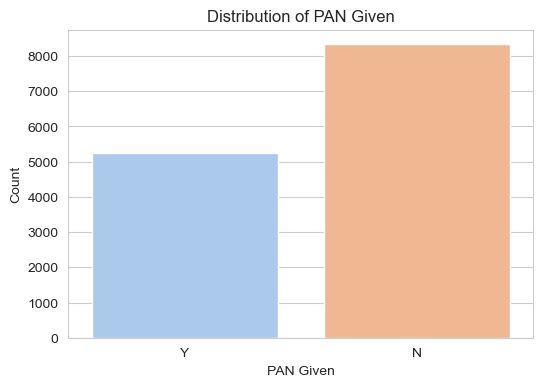

In [20]:
df['PAN Given'] = df['PAN Given'].astype(str)
plt.figure(figsize=(6,4))
sns.set_style("whitegrid")
sns.countplot(x='PAN Given', data=df, palette='pastel')
plt.title('Distribution of PAN Given')
plt.xlabel('PAN Given')
plt.ylabel('Count')
plt.show()

<font size="+0.5"  color="Orange">
    
- **OBSERVATION**
- **Transaction/donations made without PAN details are considerably high**

#

### 2) Amount Distribution for PAN Details

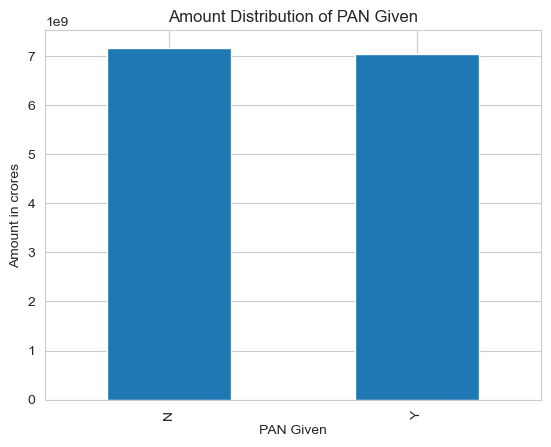

In [21]:
PAN_and_Donation = df.groupby(['PAN Given'])['Amount'].sum()
PAN_and_Donation.plot(kind = 'bar')
plt.title('Amount Distribution of PAN Given')
plt.xlabel('PAN Given')
plt.ylabel('Amount in crores')
plt.show()

<font size="+0.5"  color="Orange">
    
- **OBSERVATION**
- **Amount sum for donations with PAN attached and without PAN details attached are almost equal**

### 3) Amount destribution by considering amount range with PAN details

In [22]:
df['Amount'].describe()

count    1.357300e+04
mean     1.045728e+06
std      8.780605e+06
min      1.875000e+03
25%      3.200000e+04
50%      6.000000e+04
75%      2.000000e+05
max      5.000000e+08
Name: Amount, dtype: float64

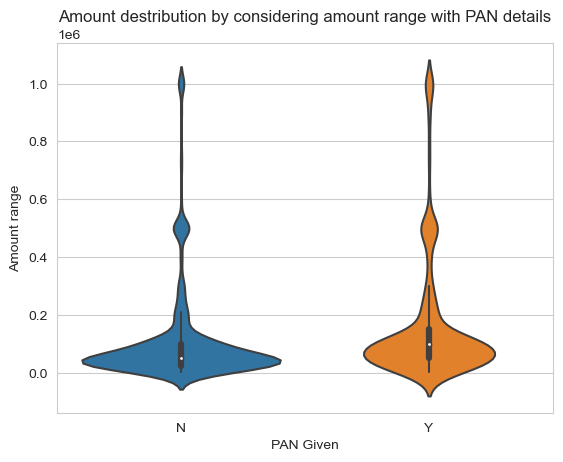

In [23]:
amount_90th_percentile = df['Amount'].quantile(0.90)
filtered_df = df[df['Amount'] <= amount_90th_percentile]
sns.violinplot(x='PAN Given', y='Amount', data=filtered_df)
plt.title('Amount destribution by considering amount range with PAN details')
plt.xlabel('PAN Given')
plt.ylabel('Amount range')
plt.show()

<font size="+0.5"  color="Orange">
    
- **OBSERVATION**
- **The donations without PAN details having lesser amount range are more compared to the donations with PAN details**

#

### 4) Yearly distribution of total donation

In [24]:
yearly_donation_distribution = df.groupby(['Financial Year'])['Amount'].sum()
yearly_donation_distribution

Financial Year
2003-04     146162222
2004-05     661603287
2005-06      99907293
2006-07     153178304
2007-08     350074020
2008-09     647906691
2009-10    1706671272
2010-11     253982700
2011-12     480926109
2012-13     991430132
2013-14    2477930120
2014-15    6223898440
Name: Amount, dtype: int64

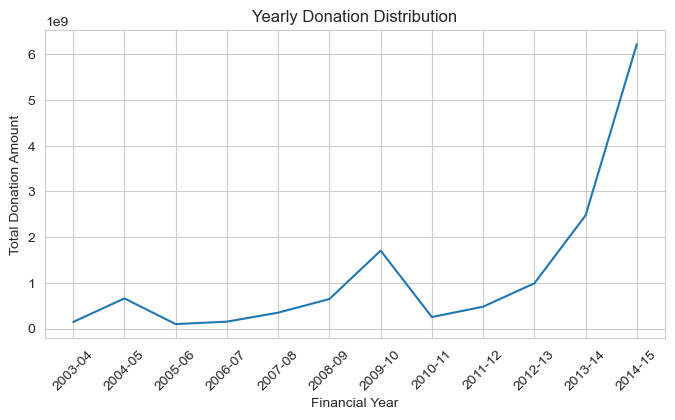

In [25]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='Financial Year', y='Amount', data=yearly_donation_distribution.reset_index())
plt.title('Yearly Donation Distribution')
plt.xlabel('Financial Year')
plt.ylabel('Total Donation Amount')
plt.xticks(rotation=45) 
plt.show()


<font size="+0.5"  color="Orange">
    
- **OBSERVATION**
- **The graph shows rapid increase of political donations after financial year 2010-11**

#

### 5) Yearly distribution of total donation for each Political Parties

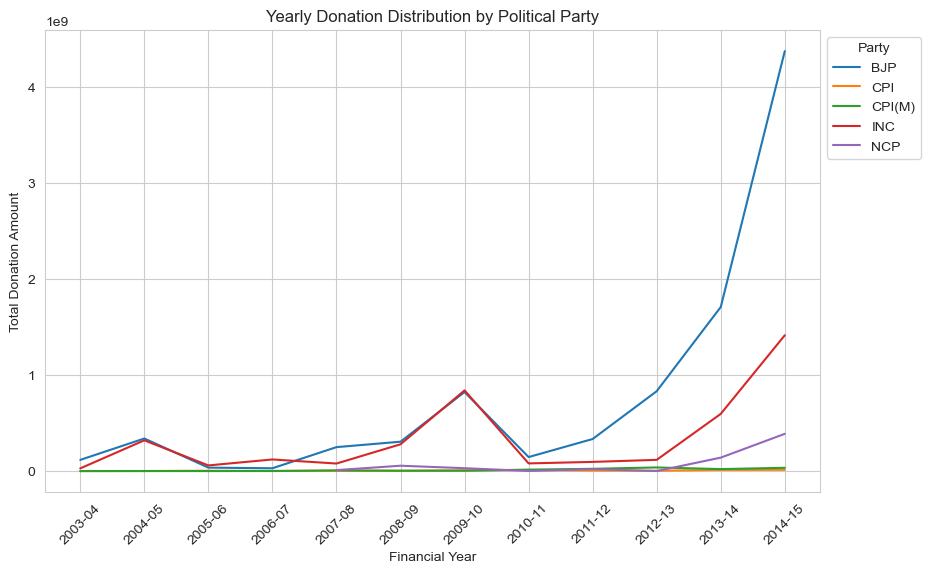

In [26]:
party_yearly_donation = df.groupby(['Financial Year', 'Party'])['Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Financial Year', y='Amount', hue='Party', data=party_yearly_donation)
plt.title('Yearly Donation Distribution by Political Party')
plt.xlabel('Financial Year')
plt.ylabel('Total Donation Amount')
plt.xticks(rotation=45) 
plt.legend(title='Party', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


<font size="+0.5"  color="Orange">
    
- **OBSERVATION**
- **The graph shows rapid increase of political donations after financial year 2010-11**
- **BJP and INC both political parties having highest donations also shows similar trend.**

#

### 6) Donation made to each parties 

In [30]:
df_parties = df.groupby(['Party'])['Amount'].sum()
df_parties

Party
BJP       9295525996
CPI         68123698
CPI(M)     150622128
INC       4031487349
NCP        647911419
Name: Amount, dtype: int64

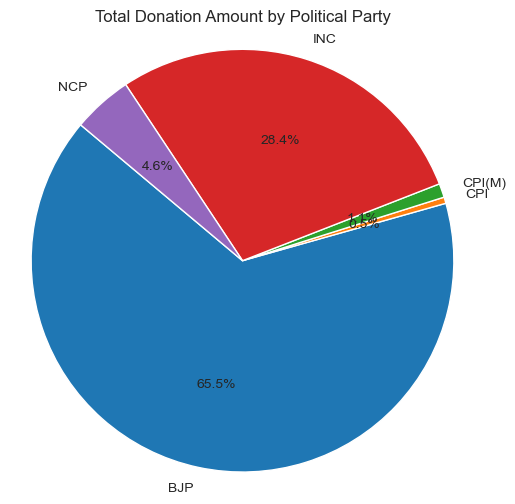

In [33]:
df_parties = df_parties.reset_index()
plt.figure(figsize=(6,6))
plt.pie(df_parties['Amount'], labels=df_parties['Party'], autopct='%1.1f%%', startangle=140)
plt.title('Total Donation Amount by Political Party')
plt.axis('equal')
plt.show()


<font size="+0.5"  color="Orange">
    
- **OBSERVATION**
- **BJP and INC among other parties received larger share of donations**

#

### 7) Donation made without PAN for each Parties

In [34]:
df.head()

,Party,Name,PAN Given,Amount,Financial Year
0,CPI,Aziz Pasha,Y,3000000,2010-11
1,CPI(M),V K Ramachandran,Y,10000000,2014-15
2,INC,Dr. Manmohan Singh,N,108000,2014-15
3,INC,Dr. Manda Jagnathan,N,54000,2011-12
4,INC,Prof. K.V.Thomas,N,54000,2011-12


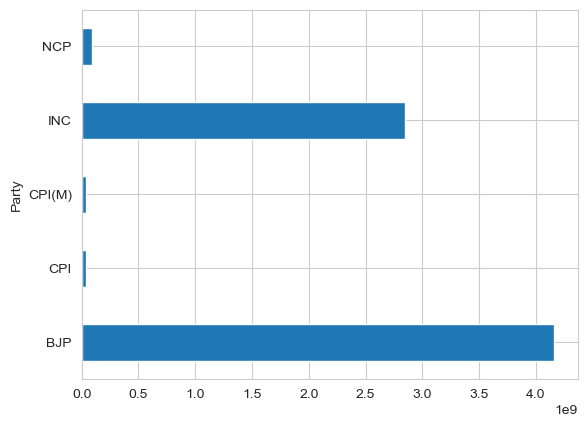

In [37]:
donation_without_pan = df[df['PAN Given'] == 'N']
donation_without_pan.groupby(['Party'])['Amount'].sum().plot(kind = 'barh')
plt.show()

#

### 8) Top 10 Largest donations made by Enterprises

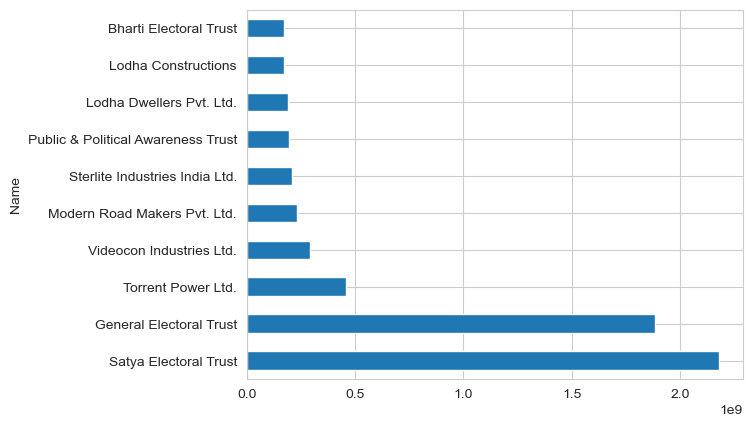

In [39]:
df.groupby(['Name'])['Amount'].sum().nlargest(10).plot(kind = 'barh')
plt.show()